In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from IPython.display import Image  
from sklearn import tree

%matplotlib inline

In [6]:
data= pd.read_excel("default of credit card clients.xls",header=1)

In [7]:
data_prop = data.drop(['ID'],axis=1)

In [8]:
df = pd.DataFrame(data_prop)

# Feature engineering : 

- var Education : 

In [9]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4

- var Mariage : 

In [10]:
fil = (df.MARRIAGE == 0) 
df.loc[fil, 'MARRIAGE'] = 3

- var PAY : 

In [11]:
fil2 = (df.PAY_0 == 0) | (df.PAY_0 == -2)
df.loc[fil2,'PAY_0'] = -1

In [12]:
fil2 = (df.PAY_2 == 0) | (df.PAY_2 == -2)
df.loc[fil2,'PAY_2'] = -1

In [13]:
fil2 = (df.PAY_3 == 0) | (df.PAY_3 == -2)
df.loc[fil2,'PAY_3'] = -1

In [14]:
fil2 = (df.PAY_4 == 0) | (df.PAY_4 == -2)
df.loc[fil2,'PAY_4'] = -1
df["PAY_4"].unique()

array([-1,  2,  3,  4,  5,  7,  6,  1,  8], dtype=int64)

In [15]:
fil2 = (df.PAY_5 == 0) | (df.PAY_5 == -2)
df.loc[fil2,'PAY_5'] = -1
df["PAY_5"].unique()

array([-1,  2,  3,  5,  4,  7,  8,  6], dtype=int64)

In [16]:
fil2 = (df.PAY_6 == 0) | (df.PAY_6 == -2)
df.loc[fil2,'PAY_6'] = -1
df["PAY_6"].unique()

array([-1,  2,  3,  6,  4,  7,  8,  5], dtype=int64)

- separation des données 

In [17]:
X = df.iloc[:, 0:23].values
y_target = df.iloc[:, -1].values

- SPLIT THE DATA INTO TRAIN AND TEST

In [19]:
from sklearn.preprocessing import StandardScaler

# Standarize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.2,random_state=0)

- KNN :

Text(0, 0.5, 'Erreur')

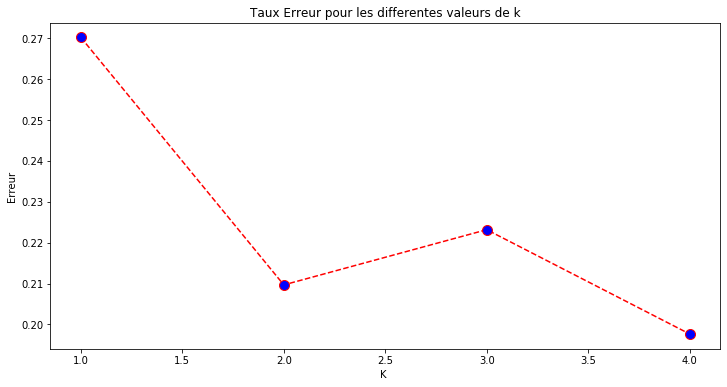

In [20]:
from sklearn.neighbors import KNeighborsClassifier
error = []
# Calculer l'erreur pour k entre 1 et 5 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 5):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 5), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(2)
knn_model = knn.fit(X_train, y_train)
y_pred_knn =knn_model.predict(X_test)

In [22]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.79


In [23]:

predictions_knn = [round(value) for value in y_pred_knn]
# evaluate predictions
accuracyknn = accuracy_score(y_test, predictions_knn)
print("Accuracy: %.2f%%" % (accuracyknn * 100.0))

Accuracy: 79.03%


- Logistic Regression : 

In [24]:
from sklearn.linear_model import LogisticRegression
# Create logistic regression object
clf = LogisticRegression(random_state=0)
# Train model
model_LR = clf.fit(X, y_target)
y_pred_LR = model_LR.predict(X_test)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(model_LR.score(X_train, y_train)))
print('Accuracy of Logistic Regression  classifier on test set: {:.2f}'
     .format(model_LR.score(X_test, y_test)))

predictionslr = [round(value) for value in y_pred_LR]
# evaluate predictions
accuracylr = accuracy_score(y_test, predictionslr)
print("Accuracy: %.2f%%" % (accuracylr * 100.0))

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic Regression classifier on training set: 0.81
Accuracy of Logistic Regression  classifier on test set: 0.82
Accuracy: 82.17%


- XGBOOST : 

In [25]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
# fit model no training data
modelXGB = XGBClassifier()
modelXGB.fit(X_train, y_train)
# make predictions for test data
y_predxg = modelXGB.predict(X_test)
predictionsxg = [round(value) for value in y_predxg]

print('Accuracy of XGBOOST classifier on training set: {:.2f}'
     .format(modelXGB.score(X_train, y_train)))
print('Accuracy of XGBOOST classifier on test set: {:.2f}'
     .format(modelXGB.score(X_test, y_test)))

# evaluate predictions
accuracyxg = accuracy_score(y_test, predictionsxg)
print("Accuracy: %.2f%%" % (accuracyxg * 100.0))

Accuracy of XGBOOST classifier on training set: 0.82
Accuracy of XGBOOST classifier on test set: 0.83
Accuracy: 82.90%


- LIGHTGBM  : 

GridSearch

In [19]:
from sklearn.model_selection import GridSearchCV
import lightgbm as ltb
# define the parameters grid
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_LG = GridSearchCV(ltb.LGBMClassifier(), param_grid, cv = 5, scoring= 'accuracy')
# the cv option will be clear in a few cells

#training
grid_LG.fit(X_train, y_train)
#let's see the best estimator
print(grid_LG.best_estimator_)
#with its score
print(np.abs(grid_LG.best_score_))

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               criterion='gini', importance_type='split', learning_rate=0.1,
               max_depth=6, max_leaf_nodes=5, min_child_samples=20,
               min_child_weight=0.001, min_samples_split=2, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
0.8189583333333333


In [27]:
import lightgbm as ltb
# fit a lightGBM model to the data
modellgb = ltb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               criterion='gini', importance_type='split', learning_rate=0.1,
               max_depth=3, max_leaf_nodes=5, min_child_samples=20,
               min_child_weight=0.001, min_samples_split=2, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
modellgb.fit(X_train, y_train)
     
# make predictions
y_pred_lgb = modellgb.predict(X_test)
predictions_lg = [round(value) for value in y_pred_lgb]   



In [28]:
print('Accuracy of Light GBM classifier on training set: {:.2f}'
     .format(modellgb.score(X_train, y_train)))
print('Accuracy of LightGBM  classifier on test set: {:.2f}'
     .format(modellgb.score(X_test, y_test)))   
# evaluate predictions
accuracylg = accuracy_score(y_test, predictions_lg)
print("Accuracy: %.2f%%" % (accuracylg * 100.0))

Accuracy of Light GBM classifier on training set: 0.82
Accuracy of LightGBM  classifier on test set: 0.83
Accuracy: 82.95%


- Random Forest : 

Gridsearch for RF

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define the parameters grid
param_grid = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced'], 'n_jobs' : [-1]} #use all the computational power you have

# create the grid
grid_RF = GridSearchCV(RandomForestClassifier(),  param_grid, cv = 5, scoring= 'accuracy')


#training
grid_RF.fit(X_train, y_train)
#let's see the best estimator
print(grid_RF.best_estimator_)
#with its score
print(np.abs(grid_RF.best_score_))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
0.8167916666666667


In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rfc_model = rfc.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)


# make predictions
y_pred_rfc = rfc_model.predict(X_test)
predictions_rfc = [round(value) for value in y_pred_rfc]   


In [30]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))
# evaluate predictions
accuracyrfc = accuracy_score(y_test, predictions_rfc)
print("Accuracy: %.2f%%" % (accuracyrfc * 100.0))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.82
Accuracy: 82.27%


- Decision Tree

GridSearch for DT

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# define the parameters grid
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')
# the cv option will be clear in a few cells

#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.8194583333333333


In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
dtc_model = dtc.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [32]:
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc_model.score(X_train, y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc_model.score(X_test, y_test)))
accuracydtc = accuracy_score(y_test, y_pred_dtc)
print("Accuracy: %.2f%%" % (accuracydtc * 100.0))

Accuracy of CART classifier on training set: 0.82
Accuracy of CART classifier on test set: 0.83
Accuracy: 82.72%


- SVM : 

In [33]:
# Load libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [34]:
# Create support vector classifier
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)

# Train classifier
modelsvc = svc.fit(X, y_target)


# make predictions
y_pred_svc = modelsvc.predict(X_test)
predictions_svc = [round(value) for value in y_pred_svc]   


In [35]:
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(modelsvc.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(modelsvc.score(X_test, y_test)))
# evaluate predictions
accuracysvc = accuracy_score(y_test, predictions_svc)
print("Accuracy: %.2f%%" % (accuracysvc * 100.0))

Accuracy of SVM classifier on training set: 0.78
Accuracy of SVM classifier on test set: 0.78
Accuracy: 78.30%


# Courbe ROC :

In [36]:
from sklearn.metrics import roc_curve, auc

In [37]:
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_knn) 
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_svc) 
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, threshold3 = roc_curve(y_test,y_pred_rfc )
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test,y_pred_lgb )
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, threshold5 = roc_curve(y_test,y_predxg )
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, threshold6 = roc_curve(y_test,y_pred_LR )
roc_auc6 = auc(fpr6, tpr6)

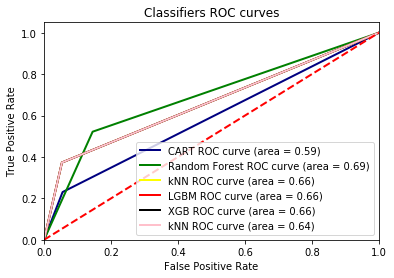

In [38]:
plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='CART ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot(fpr3, tpr3, color='red', lw=2, label='LGBM ROC curve (area = %0.2f)'% roc_auc4)
plt.plot(fpr3, tpr3, color='black', lw=2, label='XGB ROC curve (area = %0.2f)'% roc_auc5)
plt.plot(fpr3, tpr3, color='pink', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc6)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

# PICKLE : 

In [44]:
import pickle

algo=[[accuracyknn,fpr1, tpr1,knn],
      [accuracysvc,fpr2, tpr2,modelsvc],
      [accuracyrfc,fpr3, tpr3,rfc_model],
      [accuracylg,fpr4, tpr4, modellgb],
      [accuracyxg,fpr5, tpr5,modelXGB],
      [accuracylr,fpr6, tpr6 ,model_LR],scaler]
# Saving model to disk
pickle.dump(algo, open('taywan.pkl','wb'))


In [45]:
import pickle
# Loading model to compare the results
model = pickle.load(open('taywan.pkl','rb'))
for i in range(len(model)):
    print(model[i])

[0.7903333333333333, array([0.        , 0.05528386, 1.        ]), array([0.      , 0.230532, 1.      ]), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')]
[0.783, array([0.        , 0.14501382, 1.        ]), array([0.        , 0.52197379, 1.        ]), SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)]
[0.8233333333333334, array([0.        , 0.05422071, 1.        ]), array([0.        , 0.37933693, 1.        ]), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                 